In [1]:
# when you change the code of .py document in the ecolab package, you have to restart the kernel of jupyter notebook and 
# run the below import code again to make sure the newest change involved.

import numpy as np
import numba
from ecolab import run_ecolab
from ecolab.environment import Environment
from ecolab.agents import Rabbit, RHD_Status
import warnings
warnings.filterwarnings("ignore")


import matplotlib
import matplotlib.pyplot as plt




In [2]:
# create the environment
env = Environment(shape = [10,10])

#create agents(infants and adults)
Ninfants = 10
Nadults = 300
Infected_Adults = 10
agents = []

for i in range(Ninfants):
    infant = Rabbit(age = np.random.randint(0,90), position = env.get_random_location()) ## age < 90 => infants
    agents.append(infant)
for i in range(Nadults):
    adult = Rabbit(age = np.random.randint(90,300), position = env.get_random_location())
    agents.append(adult)
for i in range(Infected_Adults):
    infected_adult = Rabbit(age = np.random.randint(90,300), position = env.get_random_location(), infected=True)   
    agents.append(infected_adult)


In [3]:
record, sus_num, infected_num, immune_num, total, infant_num, agents = run_ecolab(env, agents, 
                                                                                  Niteration=[0, 200], 
                                                                                  max_density=20)

iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29
iteration: 30
iteration: 31
iteration: 32
iteration: 33
iteration: 34
iteration: 35
iteration: 36
iteration: 37
iteration: 38
iteration: 39
iteration: 40
iteration: 41
iteration: 42
iteration: 43
iteration: 44
iteration: 45
iteration: 46
iteration: 47
iteration: 48
iteration: 49
iteration: 50
iteration: 51
iteration: 52
iteration: 53
iteration: 54
iteration: 55
iteration: 56
iteration: 57
iteration: 58
iteration: 59
iteration: 60
iteration: 61
iteration: 62
iteration: 63
iteration: 64
iteration: 65
iteration: 66
iteration: 67
iteration: 68
iteration: 69
iteration: 70
iteration: 71
it

In [4]:
# for i in range(100):
#     infected_adult = Rabbit(age = np.random.randint(90,300), position = env.get_random_location(), infected=True)   
#     agents.append(infected_adult)

# # The start time must be consistent with the last end time
# record, sus, infected, immune, total, infant, agents = run_ecolab(env, agents, Niteration=[250, 300],sus=sus,infected=infected, immune=immune, total=total, infant=infant)


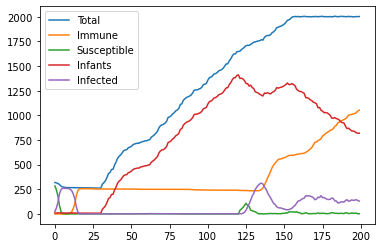

In [5]:
%matplotlib inline

fig, ax = plt.subplots()
ax.plot(total, label='Total')
ax.plot(immune_num, label='Immune')
ax.plot(sus_num, label='Susceptible')
ax.plot(infant_num, label='Infants')
ax.plot(infected_num, label='Infected')
#ax.plot(male, label='Male')
#ax.plot(female, label='Female')


leg = ax.legend();

In [6]:
def draw_animation(fig,record,fps=20,saveto=None):
    """
    Draw the animation for the content of record. This doesn't use the draw
    functions of the classes.
    - fig figure to draw to
    - record = the data to draw
    - fps = frames per second
    - saveto = where to save it to
    """
    #rc('animation', html='html5')
    if len(record)==0: return None

    im = plt.imshow(np.zeros_like(sus), interpolation='none', aspect='auto', vmin=0, vmax=3, cmap='gray')
    ax = plt.gca()

    infectedplot = ax.plot(np.zeros(1),np.zeros(1),'bo',markersize=10)
    immuneplot = ax.plot(np.zeros(1),np.zeros(1),'yx',markersize=10,mew=3)

    def animate_func(i):
            im.set_array(sus)
            ags = sus
            if len(ags)==0:
                immuneplot[0].set_data([],[])
                infectedplot[0].set_data([],[])
                return
            coords = ags[ags[:,-1].astype(bool),0:2]
            immuneplot[0].set_data(coords[:,1],coords[:,0])
            coords = ags[~ags[:,-1].astype(bool),0:2]
            infectedplot[0].set_data(coords[:,1],coords[:,0])
            #return [im]#,rabbits,foxes]

    anim = animation.FuncAnimation(
                                   fig, 
                                   animate_func, 
                                   frames = len(record),
                                   interval = 1000 / fps, repeat=False # in ms
                                   )
    if saveto is not None: anim.save(saveto, fps=fps, extra_args=['-vcodec', 'libx264']) 
    from IPython.display import HTML
    return HTML(anim.to_jshtml())

In [7]:
# %matplotlib notebook 
# fig1 = plt.figure( figsize=(8,8) )
# draw_animation(fig1, record[::5],5,saveto='test_anim.mp4') #draw every 5th frame

In [8]:
rabbit2 = Rabbit(age = np.random.randint(90,300), position = env.get_random_location())
rabbit3 = Rabbit(age = np.random.randint(0,90), position = env.get_random_location())
test=[]
test.append(rabbit2)
test.append(rabbit3)
test[0].position

array([8, 6])

In [9]:
test2 = test
test2[0].age = 10

In [10]:
rabbit2.move(env)

In [11]:
test[0].position

array([9., 4.])

In [12]:
rabbit2.position

array([9., 4.])

In [13]:
def func1(agents):
    agents.append(Rabbit(age = np.random.randint(90,300), position = env.get_random_location()))

In [14]:
func1(test)

In [15]:
test